Link to Dataset:
https://drive.google.com/drive/folders/1pTe9JUVuMszLWLvdwIOgHUsraFLsISpL?usp=sharing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil
TRAINING_DIR = "/content/drive/MyDrive/Fire_Detection/Training/Training"

training_datagen = ImageDataGenerator(rescale=1./255,	zoom_range=0.15, horizontal_flip=True, fill_mode='nearest')

VALIDATION_DIR = "/content/drive/MyDrive/Fire_Detection/Test/Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(TRAINING_DIR, target_size=(224,224), shuffle = True, class_mode='categorical', batch_size = 20)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR, target_size=(224,224), class_mode='categorical', shuffle = True, batch_size= 20)

Found 41378 images belonging to 2 classes.
Found 10608 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout

input_tensor = Input(shape=(224, 224, 3))

base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)

# add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(train_generator, steps_per_epoch = 10, epochs = 10, validation_data = validation_generator, validation_steps = 10, callbacks=[callbacks])

Epoch 1/10
10/10 [==============================] - 176s 18s/step - loss: 8.4145 - acc: 0.6050 - val_loss: 1.6069 - val_acc: 0.3300
Epoch 2/10
10/10 [==============================] - 107s 11s/step - loss: 1.0196 - acc: 0.7050 - val_loss: 1.1946 - val_acc: 0.7250
Epoch 3/10
10/10 [==============================] - 104s 11s/step - loss: 0.4221 - acc: 0.8750 - val_loss: 0.5666 - val_acc: 0.7250
Epoch 4/10
10/10 [==============================] - 105s 11s/step - loss: 0.8282 - acc: 0.8000 - val_loss: 0.7100 - val_acc: 0.6500
Epoch 5/10
10/10 [==============================] - 103s 11s/step - loss: 0.1437 - acc: 0.9500 - val_loss: 1.3654 - val_acc: 0.6750
Epoch 6/10
10/10 [==============================] - 110s 11s/step - loss: 0.3251 - acc: 0.9050 - val_loss: 0.5457 - val_acc: 0.7550
Epoch 7/10
10/10 [==============================] - 93s 10s/step - loss: 0.8566 - acc: 0.8850 - val_loss: 0.8253 - val_acc: 0.6300
Epoch 8/10
10/10 [==============================] - 100s 10s/step - loss: 0.1

In [ ]:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['acc'])


class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_loss')<=0.1099 and logs.get('loss')<=0.1099):
      print('\n\n Reached The Destination!')
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(train_generator, steps_per_epoch = 10, epochs = 10, validation_data = validation_generator, validation_steps = 10, callbacks=[callbacks])
print(len(base_model.layers))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
10/10 [==============================] - 109s 10s/step - loss: 1.9549 - acc: 0.4550 - val_loss: 0.7654 - val_acc: 0.6850
Epoch 2/10
10/10 [==============================] - 107s 11s/step - loss: 0.9938 - acc: 0.6000 - val_loss: 0.6082 - val_acc: 0.7750
Epoch 3/10
10/10 [==============================] - 100s 10s/step - loss: 0.5032 - acc: 0.8000 - val_loss: 0.9212 - val_acc: 0.6750
Epoch 4/10
10/10 [==============================] - 95s 10s/step - loss: 0.3104 - acc: 0.9000 - val_loss: 0.9125 - val_acc: 0.6800
Epoch 5/10
10/10 [==============================] - 104s 11s/step - loss: 0.2826 - acc: 0.8800 - val_loss: 0.8120 - val_acc: 0.7300
Epoch 6/10
10/10 [==============================] - 96s 10s/step - loss: 0.2543 - acc: 0.9200 - val_loss: 0.9575 - val_acc: 0.6450
Epoch 7/10
10/10 [==============================] - 91s 9s/step - loss: 0.1818 - acc: 0.9500 - val_loss: 0.9023 - val_acc: 0.6450
Epoch 8/10
10/10 [==============================] - 168s 18s/step - loss: 0.2657

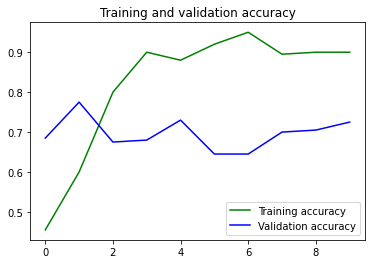

<Figure size 432x288 with 0 Axes>

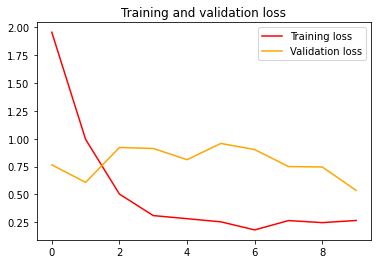

<Figure size 432x288 with 0 Axes>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

Saving Check1.jpg to Check1 (1).jpg
True 0.99866104


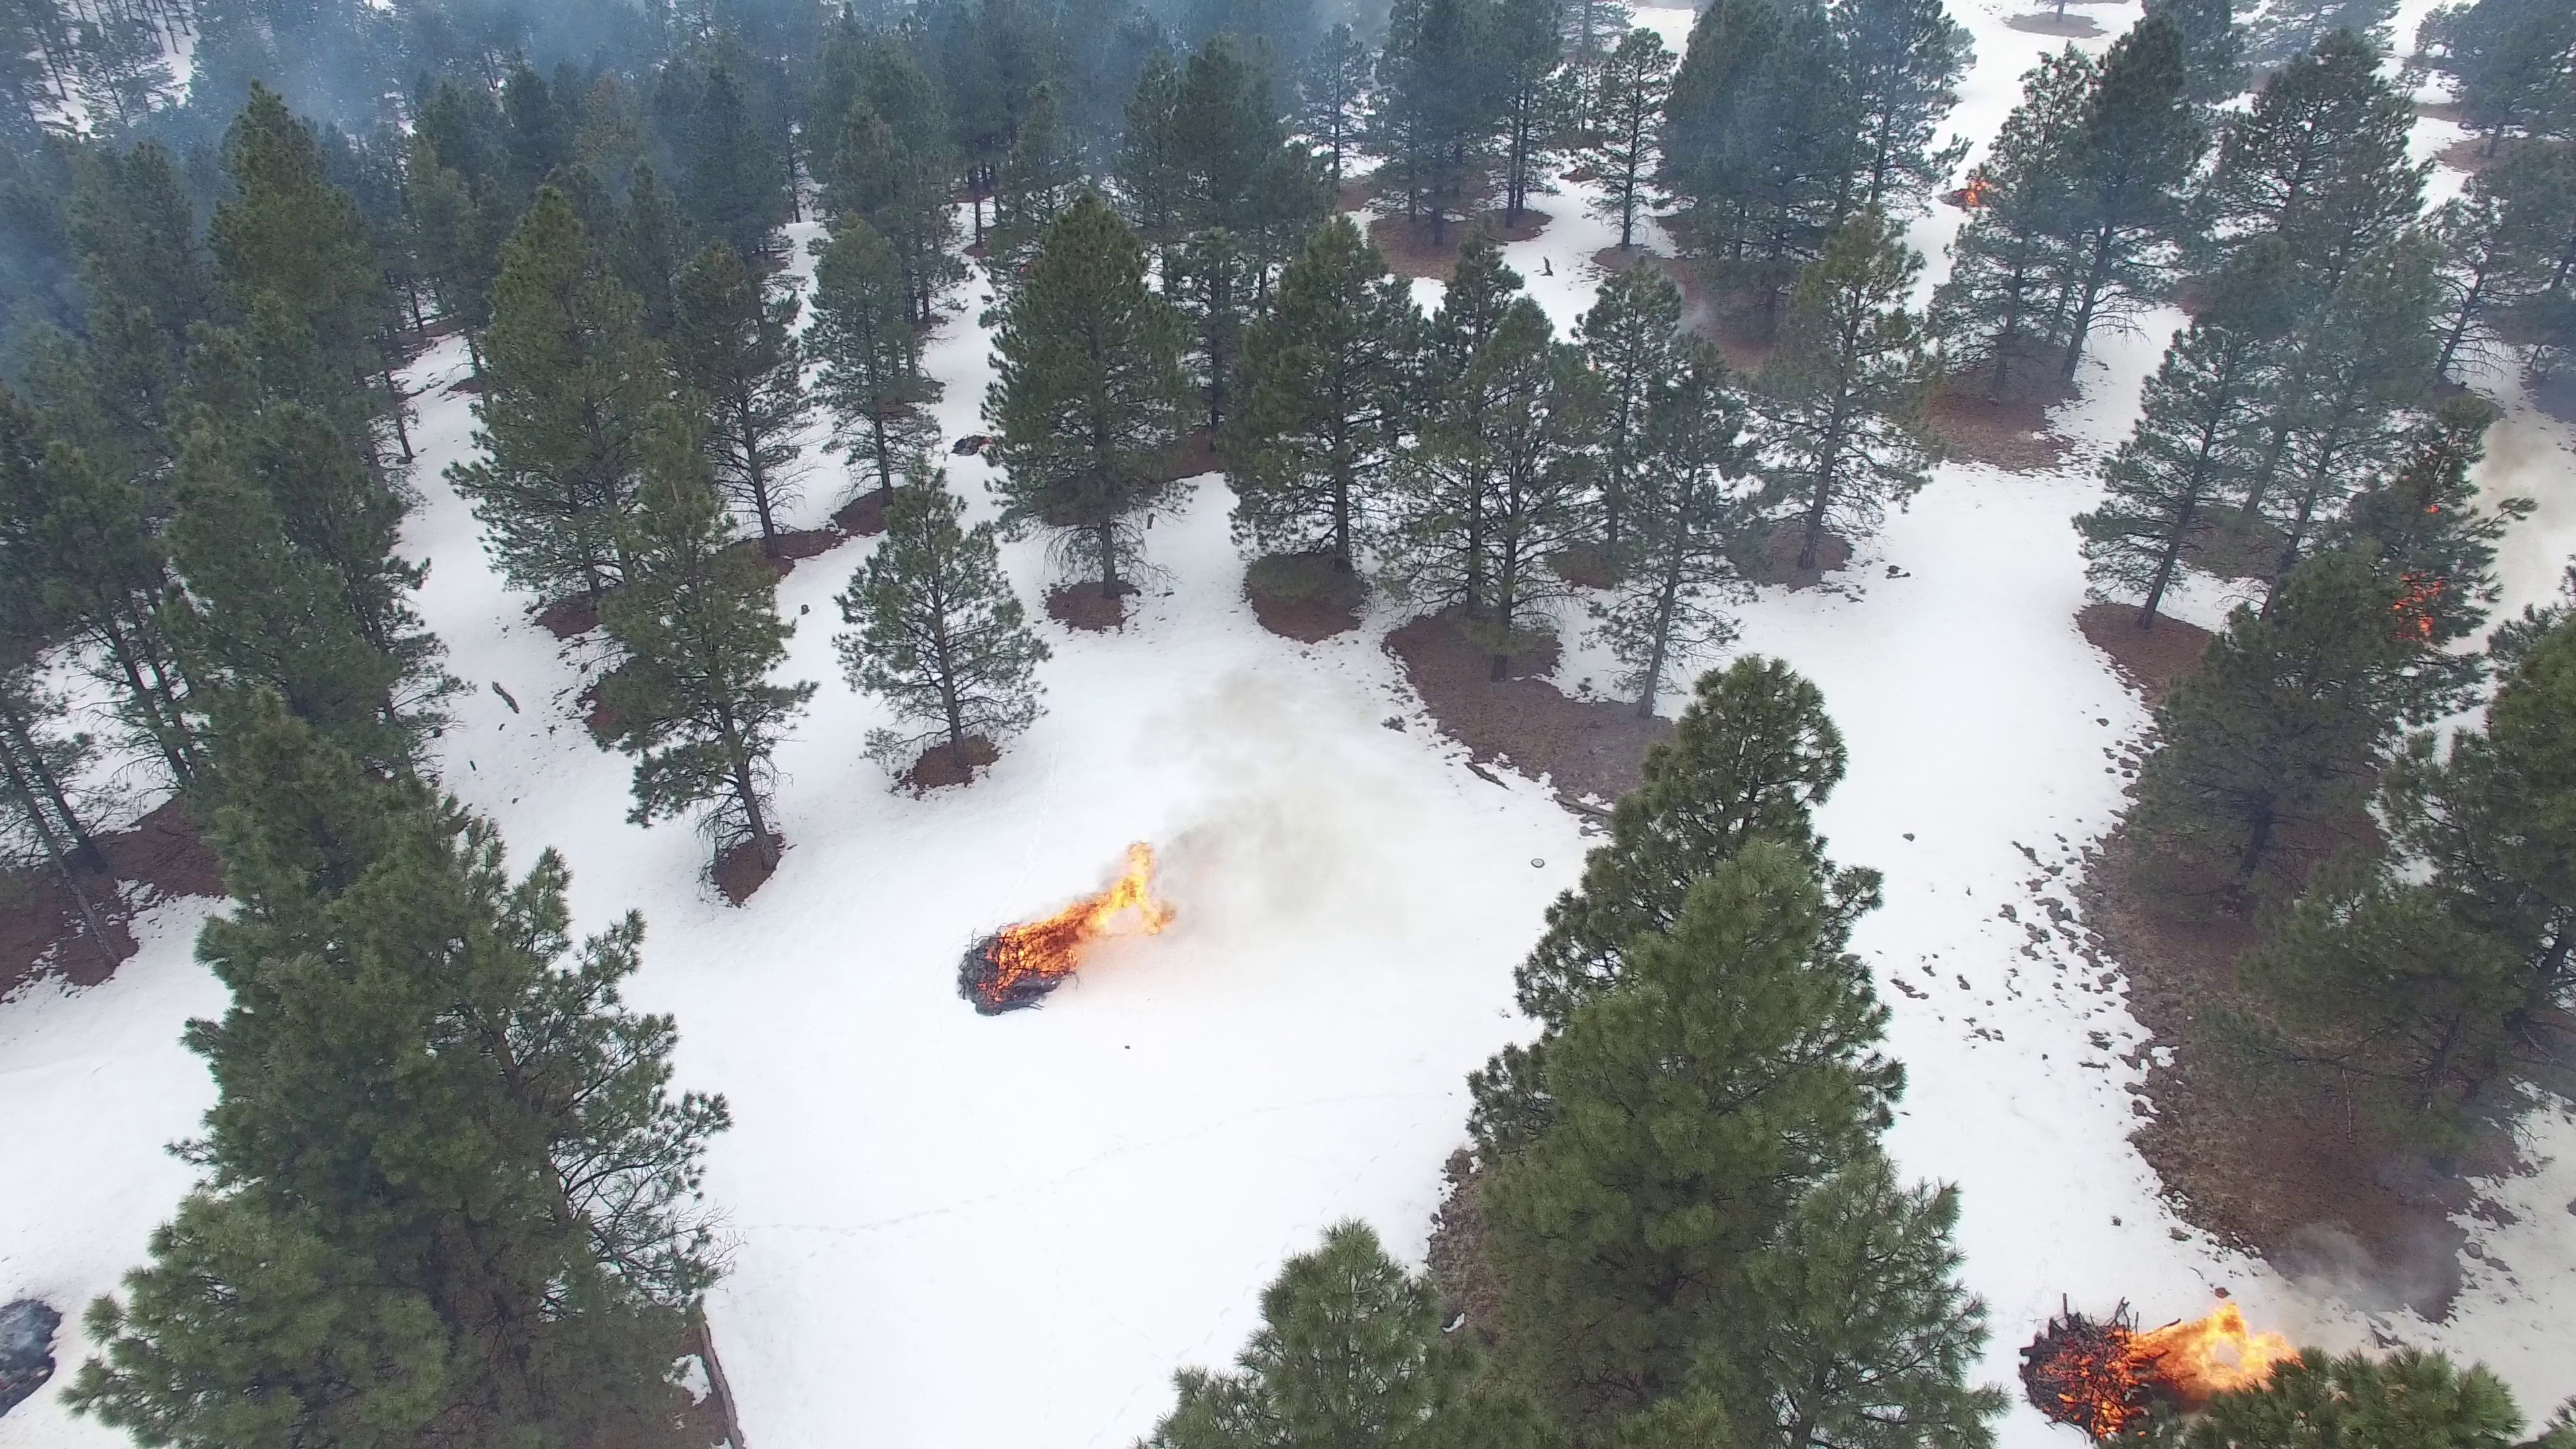

In [ ]:
#predicting any random image
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))

#checking the image to see if prediction was true
from IPython.display import Image, display
display(Image('/content/drive/MyDrive/Check1.jpg'))

Saving Check2.jpg to Check2 (1).jpg
False 0.99467814


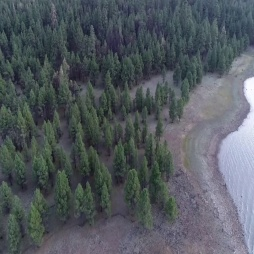

In [ ]:
#predicting any random image
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))

#checking the image to see if prediction was true
from IPython.display import Image, display
display(Image('/content/drive/MyDrive/Check2.jpg'))

Saving Check3.jpg to Check3 (1).jpg
True 0.9948821


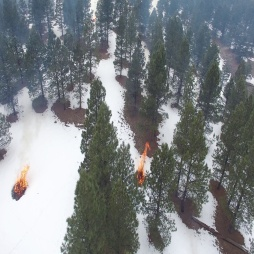

In [ ]:
#predicting any random image
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))

#checking the image to see if prediction was true
from IPython.display import Image, display
display(Image('/content/drive/MyDrive/Check3.jpg'))

Saving Check4.jpg to Check4.jpg
True 0.5613857


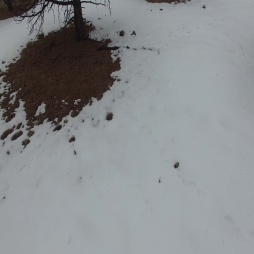

In [ ]:
#predicting any random image
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))

 #checking the image to see if prediction was true
from IPython.display import Image, display
display(Image('/content/drive/MyDrive/Check4.jpg'))

Saving Check5.jpg to Check5 (4).jpg
True 0.87697375


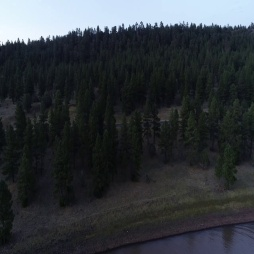

In [ ]:
#predicting any random image
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))

 #checking the image to see if prediction was true
from IPython.display import Image, display
display(Image('/content/drive/MyDrive/Check5.jpg'))

Saving Check6.jpg to Check6 (1).jpg
True 0.8752038


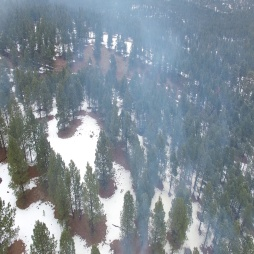

In [ ]:
#predicting any random image
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))

 #checking the image to see if prediction was true
from IPython.display import Image, display
display(Image('/content/drive/MyDrive/Check6.jpg'))

Saving Check7.jpg to Check7 (1).jpg
True 0.96170694


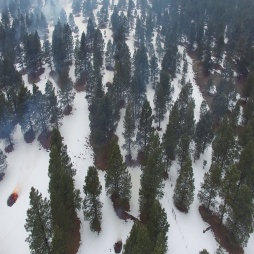

In [ ]:
#predicting any random image
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))

 #checking the image to see if prediction was true
from IPython.display import Image, display
display(Image('/content/drive/MyDrive/Check7.jpg'))

Saving Check8.jpg to Check8.jpg
True 0.89366966


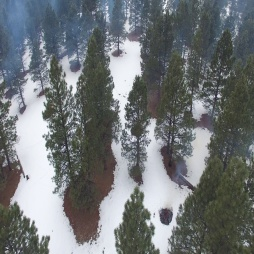

In [ ]:
#predicting any random image
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))

 #checking the image to see if prediction was true
from IPython.display import Image, display
display(Image('/content/drive/MyDrive/Check8.jpg'))

Saving Check9.jpg to Check9 (2).jpg
True 0.83332676


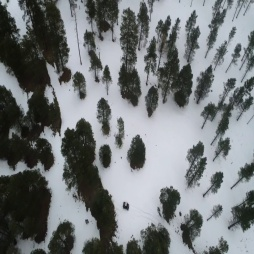

In [ ]:
#predicting any random image
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))

 #checking the image to see if prediction was true
from IPython.display import Image, display
display(Image('/content/drive/MyDrive/Check9.jpg'))

Saving Check10.jpg to Check10 (1).jpg
True 0.9135386


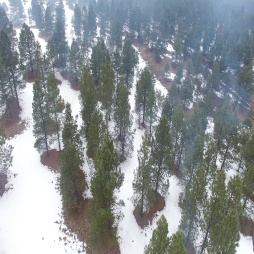

In [ ]:
#predicting any random image
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))

 #checking the image to see if prediction was true
from IPython.display import Image, display
display(Image('/content/drive/MyDrive/Check10.jpg'))